# Importing Libraries

In [27]:
pip install --upgrade scikit-learn

  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\anaconda\\lib\\site-packages\\~klearn\\datasets\\_svmlight_format.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import (KFold,RepeatedKFold, LeaveOneOut, StratifiedKFold, train_test_split, cross_validate,LeavePOut)


In [2]:
#read the data 
df = pd.read_csv("Dry_Bean_Data_Final.csv")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.shape

(13600, 17)

# Checking Missing Values

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There is no missing values in the dataset

# Standardising the data

In [6]:
#create features and labels arrays from the data and standardize the features
X = df.drop('Class',axis =1)
y = df.Class

#standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# PCA

Create Principal components and merge the component with the target variable. Then i will extract all the components and decide how many components to use in the model.

In [7]:
#create PCA model and create the dataset containing extracted principal components and target variable
pca = PCA(random_state =123).fit(data_scaled)
principalComponents = PCA(random_state = 123).fit_transform(data_scaled)

#create the principal components dataframe
principalDf = pd.DataFrame(data = principalComponents, columns =['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16'])

#merge this data with the target variable
finalDf_PCA = pd.concat([principalDf,df.Class], axis = 1)

In [8]:
finalDf_PCA.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,Class
0,-4.983475,1.824254,0.749365,-0.390371,-0.032792,0.301642,0.611022,-0.274499,-0.235265,-0.035502,0.003005,0.037317,-0.039706,-0.000637,-0.002121,-0.000419,SEKER
1,-5.439172,2.932220,2.182253,-0.431966,1.227814,0.045447,1.692405,-0.317401,-0.178480,0.101402,0.145550,0.120781,-0.043035,0.004806,0.002281,-0.003106,SEKER
2,-4.760123,1.826707,0.514416,-0.125645,0.132165,0.208816,0.600425,-0.161902,-0.212452,-0.024383,-0.011022,0.037636,-0.029516,0.000972,-0.002494,-0.000219,SEKER
3,-4.302796,2.003679,3.554012,0.083189,0.802867,0.502443,0.660901,-0.672488,-0.143207,0.032556,0.028631,0.075701,-0.022990,-0.006644,0.002403,-0.001675,SEKER
4,-6.351557,4.088134,1.179913,-0.829931,-0.036188,-0.278014,1.729791,-0.893294,-0.001541,0.133896,0.329288,0.028800,-0.080511,-0.000996,0.011602,-0.005880,SEKER


# Plotting first two dimensions of PCA

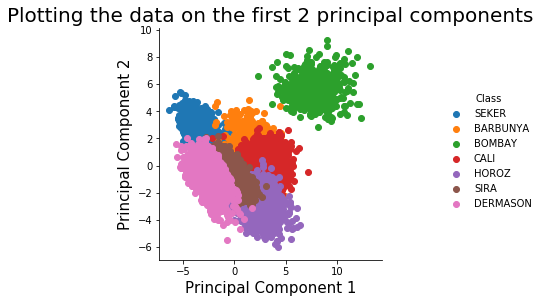

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(finalDf_PCA, hue="Class", height=4).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("Plotting the data on the first 2 principal components", fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.show()

In [10]:
def PCA_Variance_Explained(components):
    pca = PCA(n_components = components, random_state=123)
    
    #fit PCA for i components
    pca_results = pca.fit_transform(data_scaled)
    
    #project the transformations back
    pca_proj_back = pca.inverse_transform(pca_results)
    
    #calculate the mean squared error
    loss = ((data_scaled - pca_proj_back)**2).mean()
    
    #calculate the cumulative proportion of variance explained
    cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)
    
    print("The reconsrtuction error for {} components is {:.2f}".format(components,loss))
    print("The cumulative variance explained for {} components is {:.2f}%".format(components, cum_var[components-1]))

In [11]:
PCA_Variance_Explained(4)

The reconsrtuction error for 4 components is 0.05
The cumulative variance explained for 4 components is 95.03%


In [12]:
pca.explained_variance_ratio_

array([5.54660413e-01, 2.64309805e-01, 8.00759898e-02, 5.11503294e-02,
       2.73749648e-02, 1.15010220e-02, 6.97603201e-03, 3.24977208e-03,
       5.16262322e-04, 9.09782045e-05, 6.58811262e-05, 1.83926892e-05,
       9.28513832e-06, 6.26841088e-07, 1.34150878e-07, 1.11465295e-07])

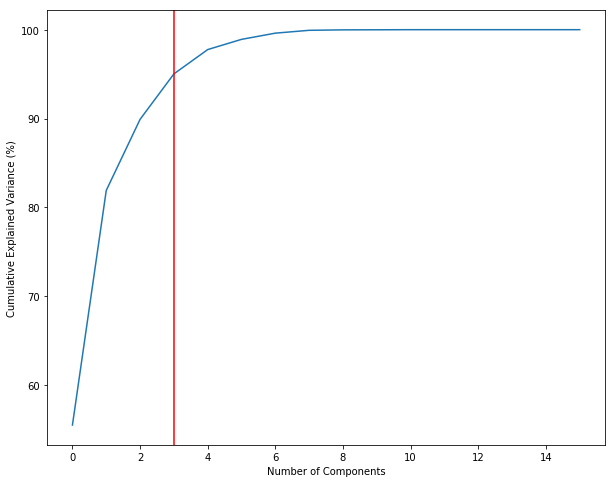

In [13]:
#plotting the cumulative variance plot
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')

#plotting a red line on the 4th component
plt.axvline(x=3,color ='red')
plt.show()

Defined a function that outputs the reconstruction error and variance explained by a given number of components.

In [45]:
#creating the features data out of PCA data using only the first 4 components
X = finalDf_PCA.drop('Class', axis =1)
X = X.iloc[:,0:4].values
y=np.ravel(finalDf_PCA.Class)

#random splitting of the data to training and validation data at 75:25 proportion
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

#building a logistic regression model
logisticRegr = LogisticRegression(max_iter=1000)
model=logisticRegr.fit(x_train,y_train)

#calcultaing accuracy on training and validation data
score_test = model.score(x_test,y_test)
score_train = model.score(x_train,y_train)
print("The accuracy on training data is {:.2f}% and on validation data is {:.2f}%". format(score_train*100, score_test*100))

The accuracy on training data is 89.26% and on validation data is 88.41%




seems like the above logistic regression model that uses 4 principal components as the features data is overfitting. This issue can be addressed using regularizers. Since this is not the main topic of this analysis, leaving it here.

# Precision,recall and F1 score

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict=model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    BARBUNYA       0.80      0.69      0.74       324
      BOMBAY       1.00      0.99      1.00       127
        CALI       0.81      0.86      0.83       412
    DERMASON       0.92      0.90      0.91       867
       HOROZ       0.96      0.94      0.95       486
       SEKER       0.94      0.94      0.94       529
        SIRA       0.81      0.87      0.84       655

    accuracy                           0.88      3400
   macro avg       0.89      0.88      0.89      3400
weighted avg       0.89      0.88      0.88      3400



# Confusion Matrix

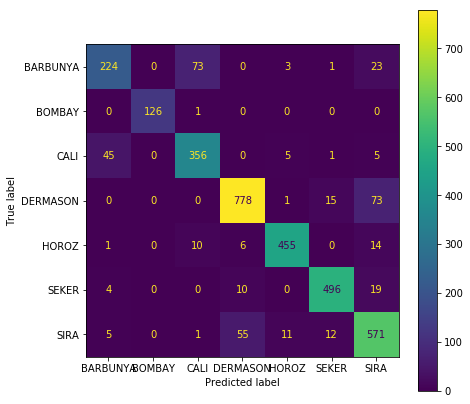

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, x_test, y_test, ax=ax) 

In [49]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []
    categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [50]:
cm = confusion_matrix(y_test, predict)

In [51]:
list_cm = counts_from_confusion(cm)

In [52]:
list_cm

[{'TP': 224, 'FN': 100.0, 'FP': 55.0, 'TN': 3021.0},
 {'TP': 126, 'FN': 1.0, 'FP': 0.0, 'TN': 3273.0},
 {'TP': 356, 'FN': 56.0, 'FP': 85.0, 'TN': 2903.0},
 {'TP': 778, 'FN': 89.0, 'FP': 71.0, 'TN': 2462.0},
 {'TP': 455, 'FN': 31.0, 'FP': 20.0, 'TN': 2894.0},
 {'TP': 496, 'FN': 33.0, 'FP': 29.0, 'TN': 2842.0},
 {'TP': 571, 'FN': 84.0, 'FP': 134.0, 'TN': 2611.0}]

# True Positive Rate

In [53]:
True_positive_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    TPR = list_cm[i]["TP"]*100/(list_cm[i]["TP"]+list_cm[i]["FN"])
    
    True_positive_Rate.append({ TPR,categories[i]})
    
    

In [54]:
True_positive_Rate

[{69.1358024691358, 'BARBUNYA'},
 {99.21259842519684, 'BOMBAY'},
 {86.40776699029126, 'CALI'},
 {89.73471741637832, 'DERMASON'},
 {93.62139917695474, 'HOROZ'},
 {93.76181474480151, 'SEKER'},
 {87.17557251908397, 'SIRA'}]

# False Positive Rate

In [55]:
False_positive_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    FPR = list_cm[i]["FP"]*100/(list_cm[i]["FP"]+list_cm[i]["TN"])
    
    False_positive_Rate.append({ FPR,categories[i]})

In [56]:
False_positive_Rate

[{1.788036410923277, 'BARBUNYA'},
 {0.0, 'BOMBAY'},
 {2.8447121820615795, 'CALI'},
 {2.803000394788788, 'DERMASON'},
 {0.6863417982155113, 'HOROZ'},
 {1.0101010101010102, 'SEKER'},
 {4.881602914389799, 'SIRA'}]

# Miss Classification Rate

In [57]:
Miss_Classification_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    MCR = (list_cm[i]["FP"] +  list_cm[i]["FN"])*100/(list_cm[i]["TP"]+list_cm[i]["TN"]+list_cm[i]["FP"]+list_cm[i]["FN"])
    
    Miss_Classification_Rate.append({ MCR,categories[i]})

In [58]:
Miss_Classification_Rate

[{4.5588235294117645, 'BARBUNYA'},
 {0.029411764705882353, 'BOMBAY'},
 {4.147058823529412, 'CALI'},
 {4.705882352941177, 'DERMASON'},
 {1.5, 'HOROZ'},
 {1.8235294117647058, 'SEKER'},
 {6.411764705882353, 'SIRA'}]

# Without PCA

In [32]:
#creating the features data out of PCA data using only the first 4 components
X_ = finalDf_PCA.drop('Class', axis =1)
y_=np.ravel(finalDf_PCA.Class)

#random splitting of the data to training and validation data at 75:25 proportion
x_train_,x_test_,y_train_,y_test_ = train_test_split(X_,y_,test_size=0.25,random_state=123)

#building a logistic regression model
logisticRegr1 = LogisticRegression(max_iter=1000)
model1=logisticRegr1.fit(x_train_,y_train_)

#calcultaing accuracy on training and validation data
score_test1 = model1.score(x_test_,y_test_)
score_train1 = model1.score(x_train_,y_train_)
print("The accuracy on training data is {:.2f}% and on validation data is {:.2f}%". format(score_train1*100, score_test1*100))

The accuracy on training data is 92.54% and on validation data is 92.03%


# Precision,Recall,F1 score without PCA

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict1=model1.predict(x_test_)
print(classification_report(y_test_,predict1))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       324
      BOMBAY       1.00      1.00      1.00       127
        CALI       0.94      0.95      0.94       412
    DERMASON       0.93      0.91      0.92       867
       HOROZ       0.95      0.94      0.95       486
       SEKER       0.94      0.95      0.95       529
        SIRA       0.83      0.87      0.85       655

    accuracy                           0.92      3400
   macro avg       0.93      0.93      0.93      3400
weighted avg       0.92      0.92      0.92      3400



# Confusion Matrix Without PCA

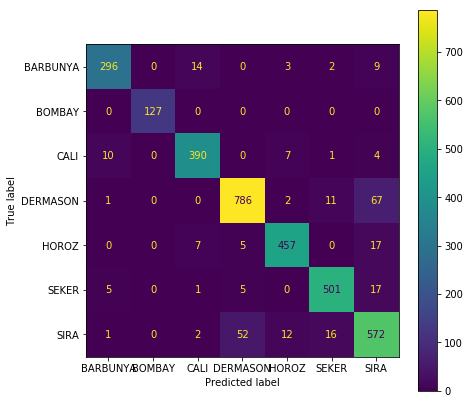

In [34]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model1, x_test_, y_test_, ax=ax) 

In [35]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []
    categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [36]:
cm1 = confusion_matrix(y_test_, predict1)

In [37]:
list_cm1 = counts_from_confusion(cm1)

In [38]:
list_cm1

[{'TP': 296, 'FN': 28.0, 'FP': 17.0, 'TN': 3059.0},
 {'TP': 127, 'FN': 0.0, 'FP': 0.0, 'TN': 3273.0},
 {'TP': 390, 'FN': 22.0, 'FP': 24.0, 'TN': 2964.0},
 {'TP': 786, 'FN': 81.0, 'FP': 62.0, 'TN': 2471.0},
 {'TP': 457, 'FN': 29.0, 'FP': 24.0, 'TN': 2890.0},
 {'TP': 501, 'FN': 28.0, 'FP': 30.0, 'TN': 2841.0},
 {'TP': 572, 'FN': 83.0, 'FP': 114.0, 'TN': 2631.0}]

# True Positive Rate without PCA

In [39]:
True_positive_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    TPR = list_cm1[i]["TP"]*100/(list_cm1[i]["TP"]+list_cm1[i]["FN"])
    
    True_positive_Rate.append({ TPR,categories[i]})
    

In [40]:
True_positive_Rate

[{91.35802469135803, 'BARBUNYA'},
 {100.0, 'BOMBAY'},
 {94.66019417475728, 'CALI'},
 {90.65743944636678, 'DERMASON'},
 {94.03292181069959, 'HOROZ'},
 {94.70699432892249, 'SEKER'},
 {87.32824427480917, 'SIRA'}]

# False Positive Rate without PCA

In [41]:
False_positive_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    FPR = list_cm1[i]["FP"]*100/(list_cm1[i]["FP"]+list_cm1[i]["TN"])
    
    False_positive_Rate.append({ FPR,categories[i]})

In [42]:
False_positive_Rate

[{0.552665799739922, 'BARBUNYA'},
 {0.0, 'BOMBAY'},
 {0.8032128514056225, 'CALI'},
 {2.447690485590209, 'DERMASON'},
 {0.8236101578586136, 'HOROZ'},
 {1.044932079414838, 'SEKER'},
 {4.1530054644808745, 'SIRA'}]

# Miss Classification Rate without PCA

In [43]:
Miss_Classification_Rate = []
categories = [ 'BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ', 'SEKER','SIRA']
for i in range(0,7):
    MCR = (list_cm1[i]["FP"] +  list_cm1[i]["FN"])*100/(list_cm1[i]["TP"]+list_cm1[i]["TN"]+list_cm1[i]["FP"]+list_cm1[i]["FN"])
    
    Miss_Classification_Rate.append({ MCR,categories[i]})

In [44]:
Miss_Classification_Rate

[{1.3235294117647058, 'BARBUNYA'},
 {0.0, 'BOMBAY'},
 {1.3529411764705883, 'CALI'},
 {4.205882352941177, 'DERMASON'},
 {1.5588235294117647, 'HOROZ'},
 {1.7058823529411764, 'SEKER'},
 {5.794117647058823, 'SIRA'}]